In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('base1.csv', sep=',')

In [3]:
print(df.head())

   Row#           specobjid         ra       dec   class     subclass  \
0     1  299489676975171584  146.71421 -1.041304  GALAXY          NaN   
1     2  299489677444933632  146.71421 -1.041304  GALAXY  STARFORMING   
2     3  299489951853078528  146.91945 -0.990492  GALAXY          NaN   
3     4  299489952322840576  146.74413 -0.652191  GALAXY          NaN   
4     5  299490226730985472  146.90229 -0.984913     QSO    BROADLINE   

   h_alpha_flux  h_beta_flux  oiii_5007_flux  nii_6584_flux  sii_6731_flux  \
0    462.117600    98.786780       72.290090     205.904600     103.055100   
1    472.590400   119.495600       68.396060     224.113600      84.180530   
2     15.469430     8.996722        0.200927      23.569140       6.665386   
3      3.417222     6.602319        5.172892      -2.430531      -0.496555   
4      0.000000    96.324520       88.410730       0.000000       0.000000   

   oi_6300_flux  
0     16.143720  
1     18.594930  
2     -0.851145  
3      3.155121  
4 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Row#              1000 non-null int64
specobjid         1000 non-null int64
ra                1000 non-null float64
dec               1000 non-null float64
class             1000 non-null object
subclass          331 non-null object
h_alpha_flux      1000 non-null float64
h_beta_flux       1000 non-null float64
oiii_5007_flux    1000 non-null float64
nii_6584_flux     1000 non-null float64
sii_6731_flux     1000 non-null float64
oi_6300_flux      1000 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 93.8+ KB


In [5]:
len(df)

1000

In [6]:
df.describe()

,Row#,specobjid,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,sii_6731_flux,oi_6300_flux
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,500.500000,2.995737e+17,146.078223,0.054417,599.148720,46.945921,195.613705,53.340809,882.812210,2.872929e+06
std,288.819436,4.746677e+13,0.541298,0.670244,20967.234709,330.749441,2606.860096,91.911178,28647.822071,7.354485e+07
min,1.000000,2.994897e+17,145.160390,-1.253860,-173469.100000,-5325.371000,-27.786610,-223.395100,-30644.590000,-3.998991e+04
25%,250.750000,2.995331e+17,145.622260,-0.467045,5.992905,2.766740,3.350662,3.758538,0.000000,0.000000e+00
50%,500.500000,2.995730e+17,146.045830,0.064056,37.880690,11.161270,8.988191,19.320865,6.583095,3.271686e+00
75%,750.250000,2.996151e+17,146.568890,0.632213,148.095525,37.778037,24.334735,56.005932,21.829628,8.410252e+00
max,1000.000000,2.996546e+17,147.329510,1.246145,637178.600000,6294.010000,67614.910000,563.458600,904856.900000,2.237958e+09


In [7]:
df.columns

Index(['Row#', 'specobjid', 'ra', 'dec', 'class', 'subclass', 'h_alpha_flux',
       'h_beta_flux', 'oiii_5007_flux', 'nii_6584_flux', 'sii_6731_flux',
       'oi_6300_flux'],
      dtype='object')

In [8]:
h_alpha = []
h_betha = []
Oiii = []
Nii = []
Sii = []
Oi = []

for n in range(len(df)):
    if df['h_alpha_flux'][n] > 0 and df['h_beta_flux'][n] > 0 and df['oiii_5007_flux'][n] > 0 and df['nii_6584_flux'][n] > 0 and df['sii_6731_flux'][n] > 0 and df['oi_6300_flux'][n] > 0:
        #print("hola")
        h_alpha.append(df['h_alpha_flux'][n])
        h_betha.append(df['h_beta_flux'][n])
        Oiii.append(df['oiii_5007_flux'][n])
        Nii.append(df['nii_6584_flux'][n])
        Sii.append(df['sii_6731_flux'][n])
        Oi.append(df['oi_6300_flux'][n])
        

In [9]:
m1 = []
m2 = []
m3 = []
m4 = []
for n in range(len(h_alpha)):
    m1.append(Oiii[n]/h_betha[n]) # y para todos
    m2.append(Nii[n]/h_alpha[n])  # x para el gráfico a
    m3.append(Sii[n]/h_alpha[n])  # x para el gráfico b
    m4.append(Oi[n]/h_alpha[n])   # x para el gráfico c

In [10]:
# Buscando valores ruido mayores a 5 en m3

for i in range(len(m3)):
    if m3[i] > 5:
        print(i)


185
272
340
371


In [11]:
# Redefiniendo valores sin ruido mayores a 5

mm1 = m1[0:184]+m1[186:271]+m1[273:339]+m1[341:370]+m1[372:len(m3)]
mm2 = m2[0:184]+m2[186:271]+m2[273:339]+m2[341:370]+m2[372:len(m3)]
mm3 = m3[0:184]+m3[186:271]+m3[273:339]+m3[341:370]+m3[372:len(m3)]
mm4 = m4[0:184]+m4[186:271]+m4[273:339]+m4[341:370]+m4[372:len(m3)]
m1 = mm1
m2 = mm2
m3 = mm3
m4 = mm4

In [12]:
M1 = []
M2 = []
M3 = []
M4 = []
for n in range(len(m1)):
    M1.append(math.log(m1[n]))
    M2.append(math.log(m2[n]))
    M3.append(math.log(m3[n]))
    M4.append(math.log(m4[n]))
    #print(M1[n], M2[n], M3[n], M4[n])

In [13]:
# Buscando valores ruido mayores a 5 en m3

for i in range(len(M3)):
    if M3[i] < -5:
        print(i)


190
226
543


In [14]:
# Redefiniendo valores sin ruido menores a -5 en MM3

Mm1 = M1[0:189]+M1[191:225]+M1[227:542]+M1[544:len(M3)]
Mm2 = M2[0:189]+M2[191:225]+M2[227:542]+M2[544:len(M3)]
Mm3 = M3[0:189]+M3[191:225]+M3[227:542]+M3[544:len(M3)]
Mm4 = M4[0:189]+M4[191:225]+M4[227:542]+M4[544:len(M3)]
M1 = Mm1
M2 = Mm2
M3 = Mm3
M4 = Mm4

In [15]:
M4

[-3.354288284589097,
 -3.235340088468119,
 -2.4519877851464433,
 -2.460213676497085,
 -3.73832238723025,
 -3.0108391567969024,
 -1.1501445293038477,
 -3.378611587522619,
 -4.494237551220818,
 -1.9170109786511147,
 -3.454972921982135,
 -3.413581889881995,
 -3.75536803597456,
 -2.961139029369543,
 -2.9789064418384217,
 -3.9011146687783795,
 -2.2408322969800705,
 -0.030857751119068837,
 -2.2970878593002815,
 -3.142122007556275,
 -3.2430047661084123,
 -1.8193422850204228,
 -1.1738398588058665,
 -4.133492796242669,
 -4.847947223008849,
 -2.5541064340936597,
 -3.149075204705139,
 -2.236980077403571,
 -3.3274423292382584,
 -3.7848472612439497,
 -1.548838594582535,
 -3.2602285431807316,
 -3.8773281881627644,
 -1.501441131912423,
 -1.9236882283190433,
 -2.851253763158465,
 -2.5559541835814024,
 -3.805881760653123,
 -3.5810301230924795,
 -3.626442691153247,
 -3.42060356668149,
 -3.127440612139247,
 -3.3132748630652924,
 -2.2731204230632898,
 -1.3745569047941661,
 -4.183165931781141,
 -2.25476654

## Gráfico Puntos

In [16]:
from matplotlib import pyplot as plt

Text(0,0.5,'log[Oiii] lamda5007/h_betha')

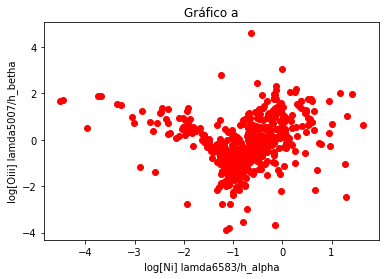

In [17]:
MM1 = M1[0:1000]
MM2 = M2[0:1000]
plt.scatter(MM2,MM1, marker="o", color="red")
plt.title('Gráfico a')
plt.xlabel('log[Ni] lamda6583/h_alpha')
plt.ylabel('log[Oiii] lamda5007/h_betha')

Text(0,0.5,'log[Oiii] lamda5007/h_betha')

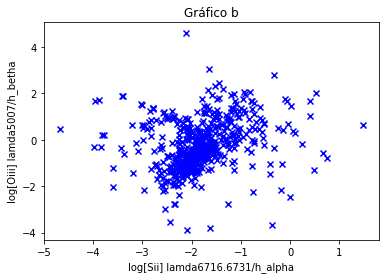

In [18]:
MM1 = M1[0:1000]
MM3 = M3[0:1000]
plt.scatter(MM3,MM1, marker="x", color="Blue")
plt.title('Gráfico b')
plt.xlabel('log[Sii] lamda6716.6731/h_alpha')
plt.ylabel('log[Oiii] lamda5007/h_betha')

Text(0,0.5,'log[Oiii] lamda5007/h_betha')

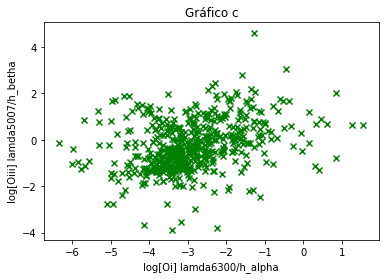

In [19]:
MM1 = M1[0:1000]
MM4 = M4[0:1000]
plt.scatter(MM4,MM1, marker="x", color="Green")
plt.title('Gráfico c')
plt.xlabel('log[Oi] lamda6300/h_alpha')
plt.ylabel('log[Oiii] lamda5007/h_betha')

Text(0.5,0,'log[Oi]l6300/h_a')

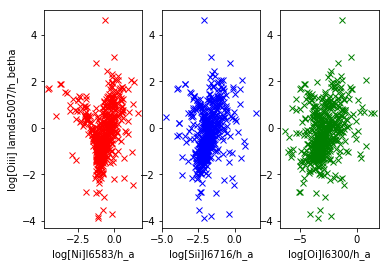

In [20]:
MM1 = M1[0:1000]
MM2 = M2[0:1000]
MM3 = M3[0:1000]
MM4 = M4[0:1000]

plt.figure()



plt.subplot(1,3,1)
plt.plot(MM2,MM1, 'x', color="Red")
plt.ylabel('log[Oiii] lamda5007/h_betha')
plt.xlabel('log[Ni]l6583/h_a')


plt.subplot(1,3,2)
plt.plot(MM3,MM1, 'x', color="Blue")
plt.xlabel('log[Sii]l6716/h_a')

plt.subplot(1,3,3)
plt.plot(MM4,MM1, 'x', color="Green")
plt.xlabel('log[Oi]l6300/h_a')


## Nuevas gráficas

# Datos KAFFMAN para NII

In [21]:
# Buscando valores de MM1 menores a 0,61

L1 = []
L2 = []
L3 = []
L4 = []

for i in range(len(MM1)):
    if MM1[i] < 0.61:
        L1.append(MM1[i])   # L1 un array que contiene todos los MM1 menores a 0,61
        L2.append(MM2[i])
        L3.append(MM3[i])
        L4.append(MM4[i])

In [22]:
L1[0]/(L2[0]-0.05)+ 1.3   # El primer dato

1.6637865702751822

In [23]:
# Ecuaciòn de KAFFMAN para NII
Q1 = []

for ii in range(len(L1)):
    Q1.append(L1[ii]/(L2[ii]-0.05)+ 1.3)

# Datos KAFFMAN para SII

In [24]:
# Buscando valores de MM1 menores a 0,61

LL1 = []
LL2 = []
LL3 = []
LL4 = []

for i in range(len(MM1)):
    if MM1[i] < 0.72:
        LL1.append(MM1[i])   # LL1 un array que contiene todos los MM1 menores a 0,72
        LL2.append(MM2[i])
        LL3.append(MM3[i])
        LL4.append(MM4[i])

In [25]:
LL1[0]/(LL3[0]-0.32)+ 1.3  # El primer dato 

1.4715282614002982

In [26]:
# Ecuaciòn de KAFFMAN para SII
Q2 = []

for ii in range(len(LL1)):
    Q2.append(LL1[ii]/(LL3[ii]-0.32)+ 1.3)

# Datos KAFFMAN para OI

In [27]:
# Buscando valores de MM1 menores a 0,61

LLL1 = []
LLL2 = []
LLL3 = []
LLL4 = []

for i in range(len(MM1)):
    if MM1[i] < 0.73:
        LLL1.append(MM1[i])   # LLL1 un array que contiene todos los MM1 menores a 0,73
        LLL2.append(MM2[i])
        LLL3.append(MM3[i])
        LLL4.append(MM4[i])

In [28]:
LLL1[0]/(LLL4[0]+0.59)+ 1.33  # El primer dato 

1.4429682240007546

In [29]:
# Ecuaciòn de KAFFMAN para OI
Q3 = []

for ii in range(len(LLL1)):
    Q3.append(LLL1[ii]/(LLL4[ii]+0.59)+ 1.33)

In [30]:
print(Q1[0], Q2[0], Q3[0])  # KAFFMAN para los tres datos

1.6637865702751822 1.4715282614002982 1.4429682240007546


In [31]:
Q1

[1.6637865702751822,
 2.00089330708924,
 1.553203683987698,
 2.399403600346814,
 1.3471859618263036,
 -4.413972326302302,
 2.447519845645259,
 2.100369851087328,
 1.9052894506484235,
 1.7466382112999919,
 1.377061473688782,
 1.8508114268012874,
 2.4026546726313818,
 4.659014007794744,
 1.87946219887705,
 1.0759767338550659,
 3.8617260132872007,
 1.6966677841512154,
 0.5210794885944952,
 2.4453234155797805,
 1.1857780332027548,
 1.939110178305174,
 2.628501676447654,
 -172.9476715830292,
 0.2298457366009976,
 2.635743725179708,
 2.730948043320395,
 3.0230706639595923,
 2.081296796526968,
 2.8250722920740845,
 2.5949627133842266,
 2.589570213793244,
 1.2501438230692492,
 2.3690971665078653,
 1.7020427970181542,
 1.3035899636758117,
 -2.8394390966910654,
 2.997778947719878,
 0.8970003463516949,
 1.1421005375915334,
 1.937406014189946,
 2.2420678404260084,
 2.9245129466336985,
 2.6079383035030754,
 1.3352828771372054,
 2.6718752053792194,
 2.253716312198417,
 2.5825331397697466,
 1.6379271

In [32]:
len(Q1)

423

# Gráficas para líneas KAFFMAN

Text(0.5,0,'log[Oi]l6300/h_a')

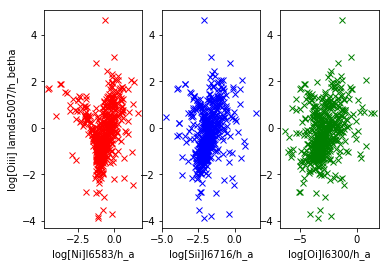

In [33]:
QQ1 = Q1[0:1000] # altura para la primera gráfica
QQ2 = Q2[0:1000] # altura para la segunda gráfica
QQ3 = Q3[0:1000] # altura para la tercera gráfica



plt.figure()



plt.subplot(1,3,1)
plt.plot(MM2,MM1, 'x', color="Red")
plt.ylabel('log[Oiii] lamda5007/h_betha')
plt.xlabel('log[Ni]l6583/h_a')


plt.subplot(1,3,2)
plt.plot(MM3,MM1, 'x', color="Blue")
plt.xlabel('log[Sii]l6716/h_a')

plt.subplot(1,3,3)
plt.plot(MM4,MM1, 'x', color="Green")
plt.xlabel('log[Oi]l6300/h_a')

Text(0.5,1,'Gráfico a')

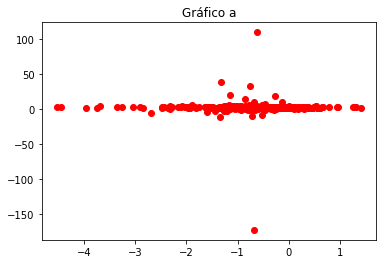

In [34]:
QQ1 = Q1[0:422] # altura para la primera gráfica
QQ2 = Q2[0:422] # altura para la segunda gráfica
QQ3 = Q3[0:422] # altura para la tercera gráfica

MM1 = M1[0:422]
MM2 = M2[0:422]

plt.scatter(MM2,QQ1, marker="o", color="red")
#plt.scatter(QQ1,MM1, marker="o", color="red")
plt.title('Gráfico a')
#plt.xlabel('log[Ni] lamda6583/h_alpha')
#plt.ylabel('log[Oiii] lamda5007/h_betha')

In [35]:
len(QQ2)

422

Text(0.5,1,'Gráfico b')

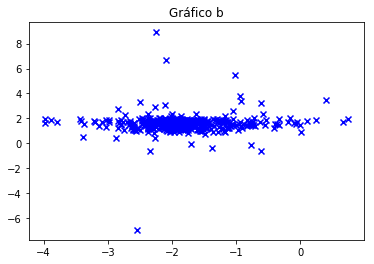

In [36]:
QQ1 = Q1[0:421] # altura para la primera gráfica
QQ2 = Q2[0:421] # altura para la segunda gráfica
QQ3 = Q3[0:421] # altura para la tercera gráfica

MM1 = M1[0:421]
MM3 = M3[0:421]
plt.scatter(MM3,QQ2, marker="x", color="Blue")
plt.title('Gráfico b')
#plt.xlabel('log[Sii] lamda6716.6731/h_alpha')
#plt.ylabel('log[Oiii] lamda5007/h_betha')

Text(0,0.5,'log[Oiii] lamda5007/h_betha')

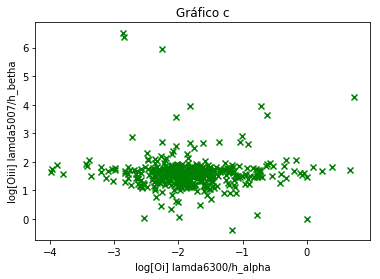

In [37]:
QQ1 = Q1[0:421] # altura para la primera gráfica
QQ2 = Q2[0:421] # altura para la segunda gráfica
QQ3 = Q3[0:421] # altura para la tercera gráfica

MM1 = M1[0:421]
MM4 = M4[0:421]

plt.scatter(MM3,QQ3, marker="x", color="Green")
plt.title('Gráfico c')
plt.xlabel('log[Oi] lamda6300/h_alpha')
plt.ylabel('log[Oiii] lamda5007/h_betha')

# Otras gráficas

# Datos KAFFMAN para NII

In [38]:
# Buscando valores de MM1 menores a 0,61

L1menor = []
L2menor = []
L3menor = []
L4menor = []

for i in range(len(MM1)):
    if MM1[i] < 0.61:
        L1menor.append(MM1[i])   # L1 un array que contiene todos los MM1 menores a 0,61
        L2menor.append(MM2[i])
        L3menor.append(MM3[i])
        L4menor.append(MM4[i])
        
# Primera gráfica
# L1 es Y
# R1 es X

# Ecuación de KAFFMAN para NII
R1menor = []

for ii in range(len(L2menor)):
    R1menor.append((L2menor[ii]-0.05)+ 1.3)


In [39]:
# Buscando valores de MM1 mayor a 0,61

L1mayor = []
L2mayor = []
L3mayor = []
L4mayor = []

for i in range(len(MM1)):
    if MM1[i] > 0.61:
        L1mayor.append(MM1[i])   # L1 un array que contiene todos los MM1 menores a 0,61
        L2mayor.append(MM2[i])
        L3mayor.append(MM3[i])
        L4mayor.append(MM4[i])
        
# Primera gráfica
# L1 es Y
# R1 es X

# Ecuación de KAFFMAN para NII
R1mayor = []

for ii in range(len(L2mayor)):
    R1mayor.append((L2mayor[ii]-0.05)+ 1.3)

Text(0,0.5,'log[Oiii] lamda5007/h_betha')

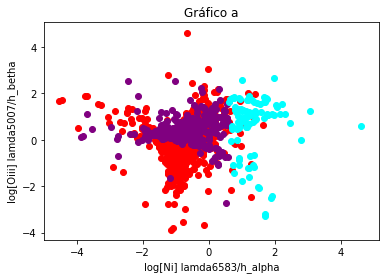

In [40]:
# Gráfica 1
RR1menor = R1menor[0:323] # Los X de la primera gráfica
LY1menor = L1menor[0:323] # Los Y de la primera gráfica 
RR1mayor = R1mayor[0:323] # Los X de la primera gráfica
LY1mayor = L1mayor[0:323] # Los Y de la primera gráfica

MR1 = M1[0:1000]
MR2 = M2[0:1000]

plt.scatter(MR2,MR1, marker="o", color="red")
plt.scatter(LY1menor,RR1menor, marker="o", color="purple") # Formación estelar
plt.scatter(LY1mayor,RR1mayor, marker="o", color="cyan") # AGN


plt.title('Gráfico a')
plt.xlabel('log[Ni] lamda6583/h_alpha')
plt.ylabel('log[Oiii] lamda5007/h_betha')

# Datos KAFFMAN para SII

In [41]:
# Buscando valores de MM1 menores a 0,72

LL1 = []
LL2 = []
LL3 = []
LL4 = []

for i in range(len(MM1)):
    if MM1[i] < 0.72:
        LL1.append(MM1[i])   # L1 un array que contiene todos los MM1 menores a 0,61
        LL2.append(MM2[i])
        LL3.append(MM3[i])
        LL4.append(MM4[i])
        
# Segunda gráfica
# LL1 es Y
# RR1 es X

# Ecuación de KAFFMAN para SII

RR1 = []

for ii in range(len(LL3)):
    RR1.append((LL3[ii]-0.32)+ 1.3)


In [42]:
len(LL1)

330

Text(0,0.5,'log[Oiii] lamda5007/h_betha')

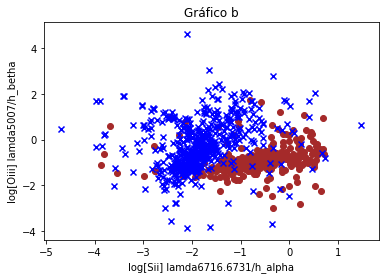

In [43]:
# Gráfica 2
RRX1menor = RR1[0:329] # Los X de la primera gráfica
LLY1menor = LL1[0:329] # Los Y de la primera gráfica 


MRR1 = M1[0:1000]
MRR3 = M3[0:1000]

plt.scatter(LLY1menor,RRX1menor, marker="o", color="brown") # Formación estelar
plt.scatter(MRR3,MRR1, marker="x", color="Blue")

plt.title('Gráfico b')
plt.xlabel('log[Sii] lamda6716.6731/h_alpha')
plt.ylabel('log[Oiii] lamda5007/h_betha')

# Datos KAFFMAN para OI

In [44]:
# Buscando valores de MM1 menores a 0,73

LLL1 = []
LLL2 = []
LLL3 = []
LLL4 = []

for i in range(len(MM1)):
    if MM1[i] < 0.73:
        LLL1.append(MM1[i])   # LLL1 un array que contiene todos los MM1 menores a 0,73
        LLL2.append(MM2[i])
        LLL3.append(MM3[i])
        LLL4.append(MM4[i])
        
# Tercera gráfica
# LLL1 es Y
# RRR1 es X

# Ecuación de KAFFMAN para NII
RRR1 = []

for ii in range(len(LLL4)):
    RRR1.append((LLL4[ii]+0.59)+ 1.33)

Text(0,0.5,'log[Oiii] lamda5007/h_betha')

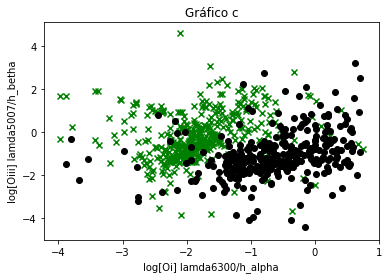

In [46]:
# Gráfico 3

MRRR1 = M1[0:1000]
MRRR4 = M4[0:1000]


RRRX1 = RRR1[0:329] # Los X de la primera gráfica
LLLY1 = LLL1[0:329] # Los Y de la primera gráfica 

plt.scatter(MM3,MM1, marker="x", color="Green")
plt.scatter(LLLY1,RRRX1, marker="o", color="black") # Formación estelar


plt.title('Gráfico c')
plt.xlabel('log[Oi] lamda6300/h_alpha')
plt.ylabel('log[Oiii] lamda5007/h_betha')